In [134]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency, shapiro
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

In [135]:
df = pd.read_csv('/Users/ranggaakhli/shopping_behavior_updated.csv')

In [136]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [138]:
df.describe().round(2)

Customer ID      Age  Purchase Amount (USD)  Review Rating  \
count      3900.00  3900.00                3900.00        3900.00   
mean       1950.50    44.07                  59.76           3.75   
std        1125.98    15.21                  23.69           0.72   
min           1.00    18.00                  20.00           2.50   
25%         975.75    31.00                  39.00           3.10   
50%        1950.50    44.00                  60.00           3.70   
75%        2925.25    57.00                  81.00           4.40   
max        3900.00    70.00                 100.00           5.00   

       Previous Purchases  
count             3900.00  
mean                25.35  
std                 14.45  
min                  1.00  
25%                 13.00  
50%                 25.00  
75%                 38.00  
max                 50.00

In [139]:
for col in ['Gender', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']:
            print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Size: ['L' 'S' 'M' 'XL']
Color: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']
Season: ['Winter' 'Spring' 'Summer' 'Fall']
Subscription Status: ['Yes' 'No']
Shipping Type: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
Discount Applied: ['Yes' 'No']
Promo Code Used: ['Yes' 'No']
Payment Method: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']
Frequency of Purchases: ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


nothing is suspiciously wrong input except frequency of purchase: redundance

In [140]:
frequency_map = {'Fortnightly': 'Fortnightly',
    'Weekly': 'Weekly',
    'Annually': 'Annually',
    'Quarterly': 'Quarterly',
    'Bi-Weekly': 'Fortnightly',
    'Monthly': 'Monthly',
    'Every 3 Months': 'Quarterly'
    
}
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_map)

In [141]:
# customer data is unnecessary columns because it was just like index

df.drop(columns='Customer ID', inplace=True)

In [142]:
df.head()

Age Gender Item Purchased  Category  Purchase Amount (USD)       Location  \
0   55   Male         Blouse  Clothing                     53       Kentucky   
1   19   Male        Sweater  Clothing                     64          Maine   
2   50   Male          Jeans  Clothing                     73  Massachusetts   
3   21   Male        Sandals  Footwear                     90   Rhode Island   
4   45   Male         Blouse  Clothing                     49         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter            3.1                 Yes        Express   
1    L     Maroon  Winter            3.1                 Yes        Express   
2    S     Maroon  Spring            3.1                 Yes  Free Shipping   
3    M     Maroon  Spring            3.5                 Yes   Next Day Air   
4    M  Turquoise  Spring            2.7                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes                  14          Venmo   
1              Yes             Yes                   2           Cash   
2              Yes             Yes                  23    Credit Card   
3              Yes             Yes                  49         PayPal   
4              Yes             Yes                  31         PayPal   

  Frequency of Purchases  
0            Fortnightly  
1            Fortnightly  
2                 Weekly  
3                 Weekly  
4               Annually

In [143]:
# check nullity

df.isnull().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [144]:
df.duplicated().sum()

0

## Univariat analysis per column

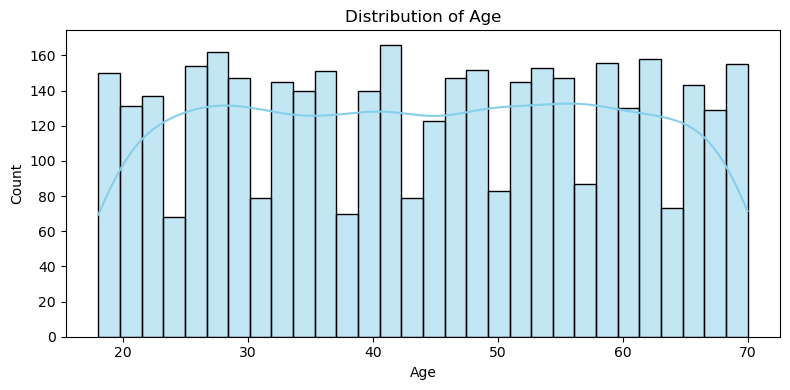

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


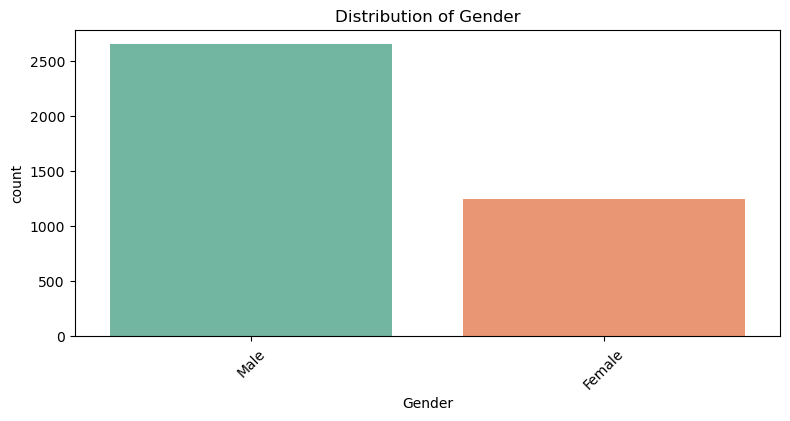

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


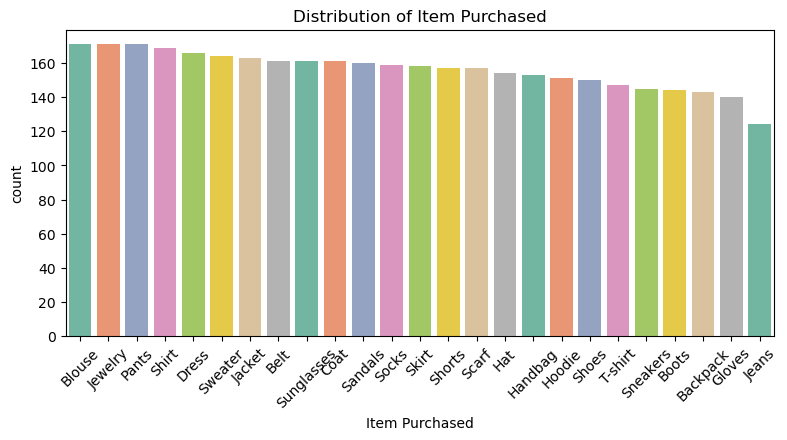

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


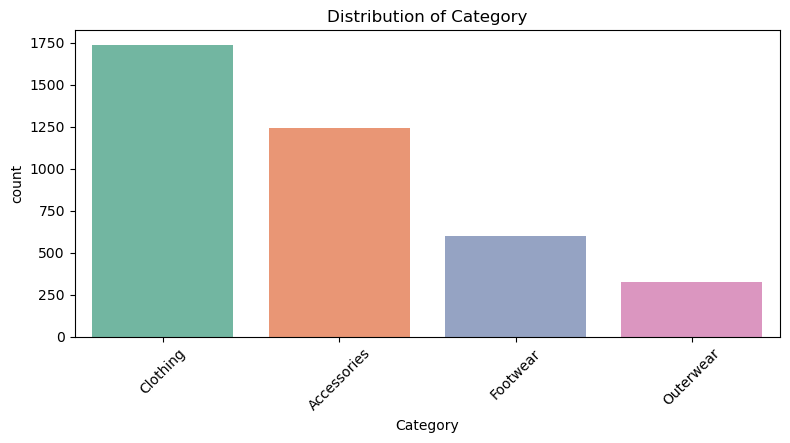

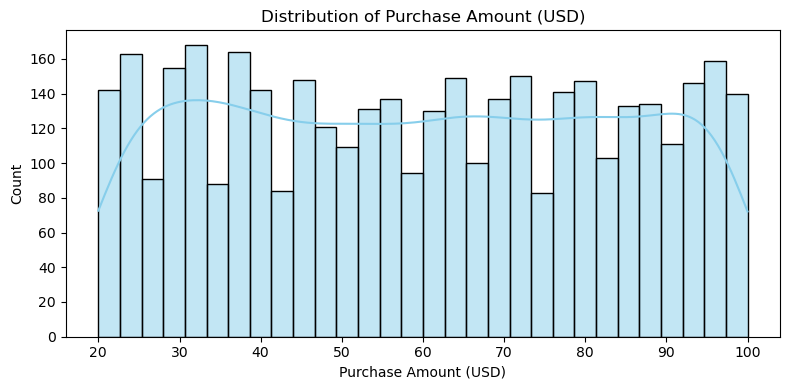

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


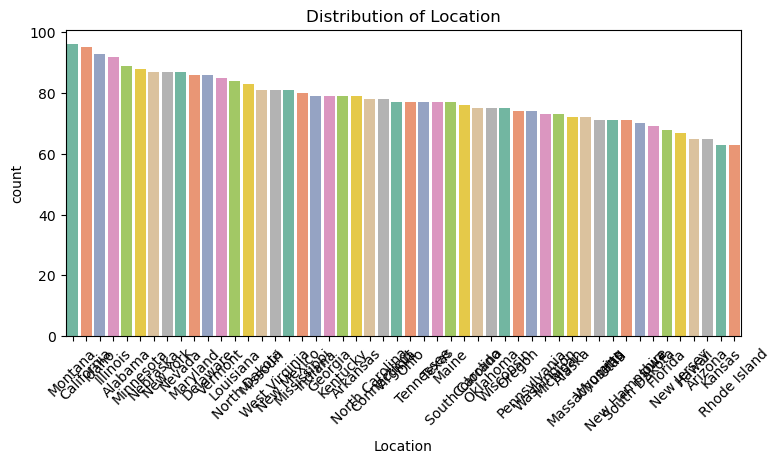

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


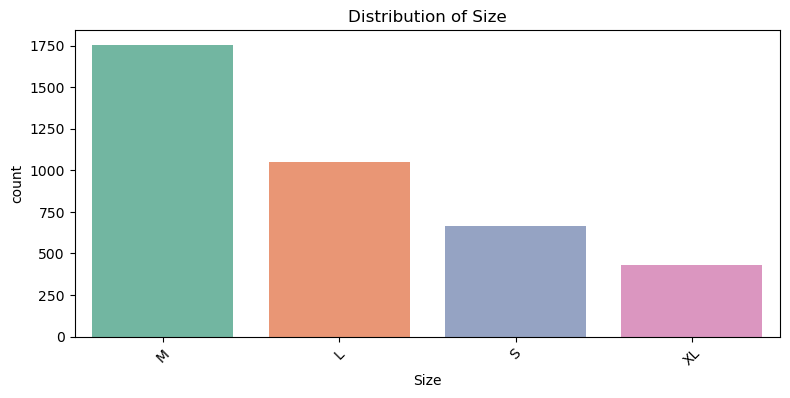

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


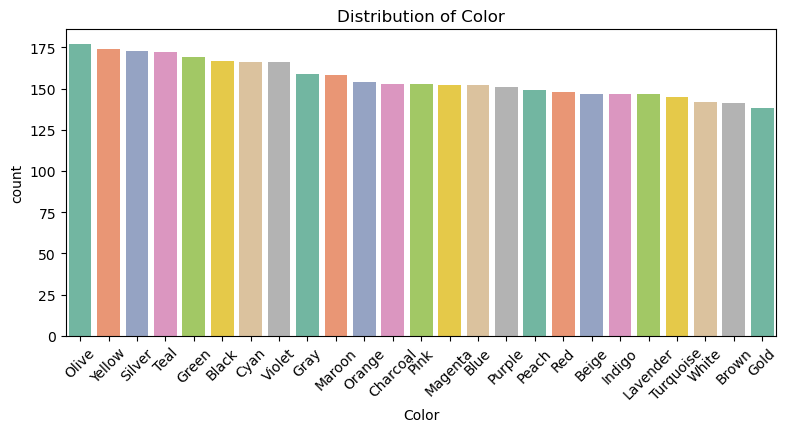

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


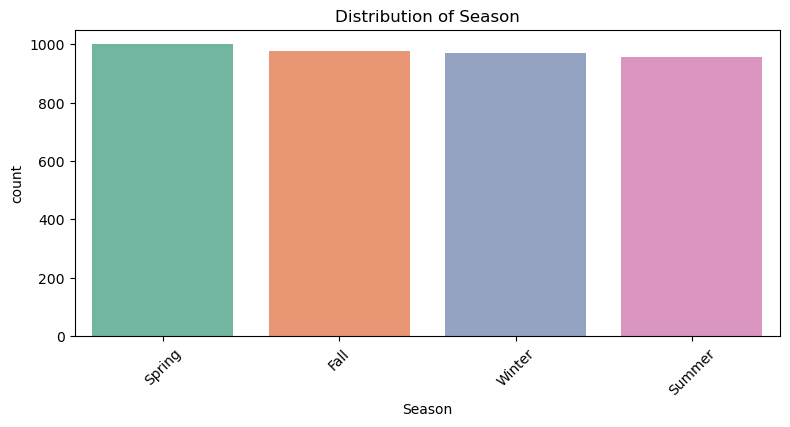

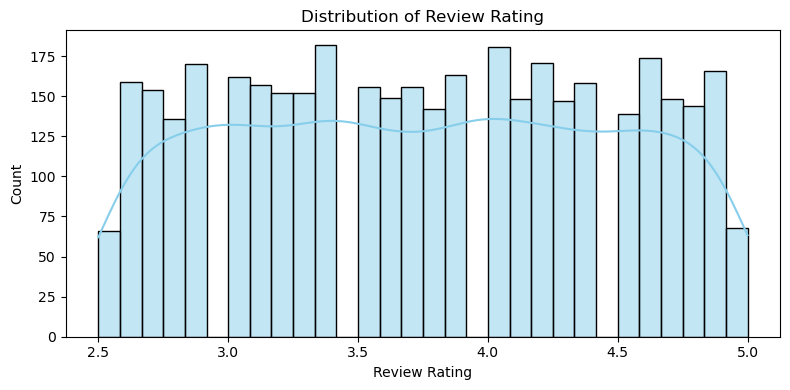

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


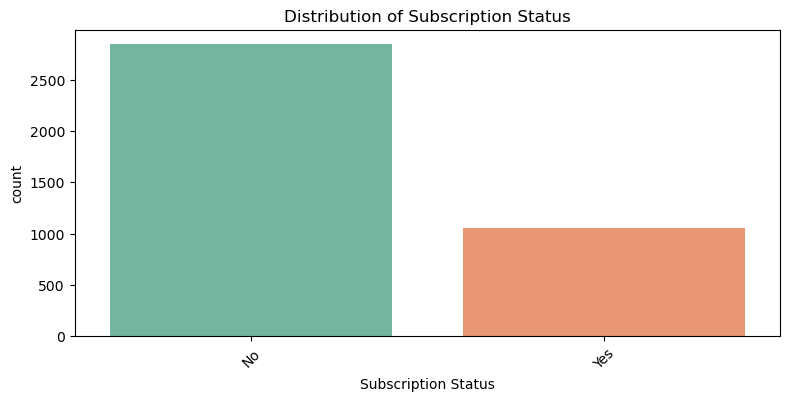

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


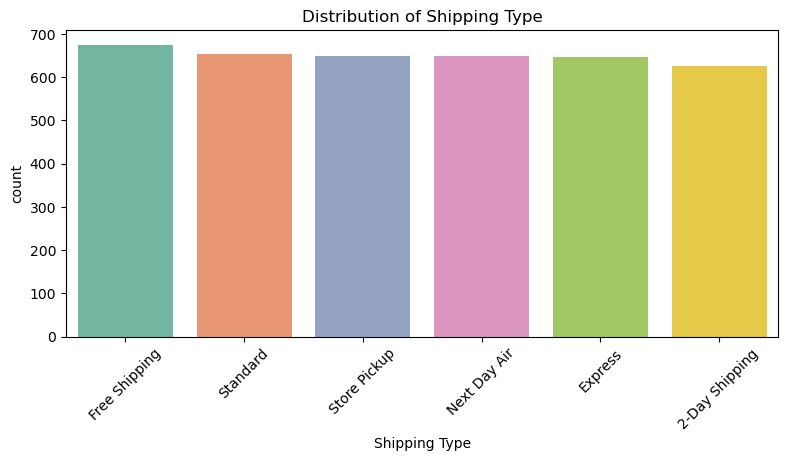

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


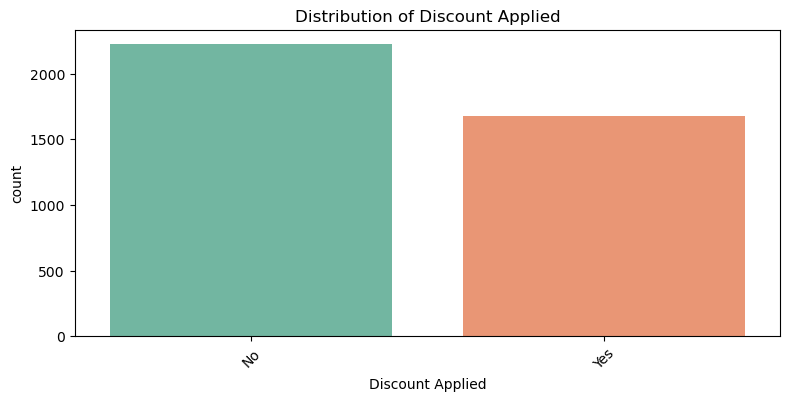

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


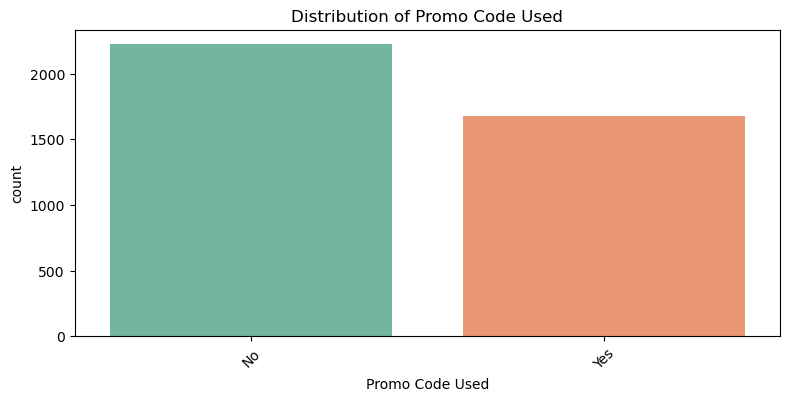

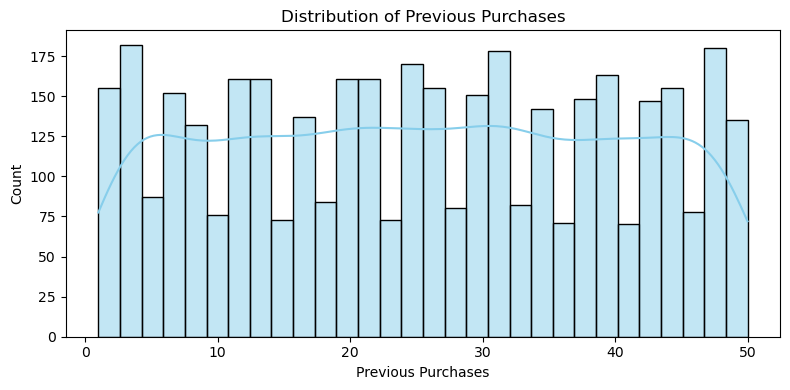

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


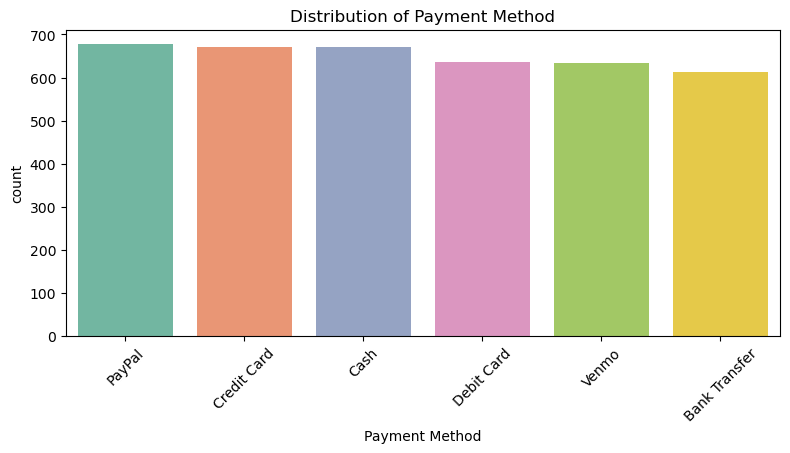

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/1572688469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,


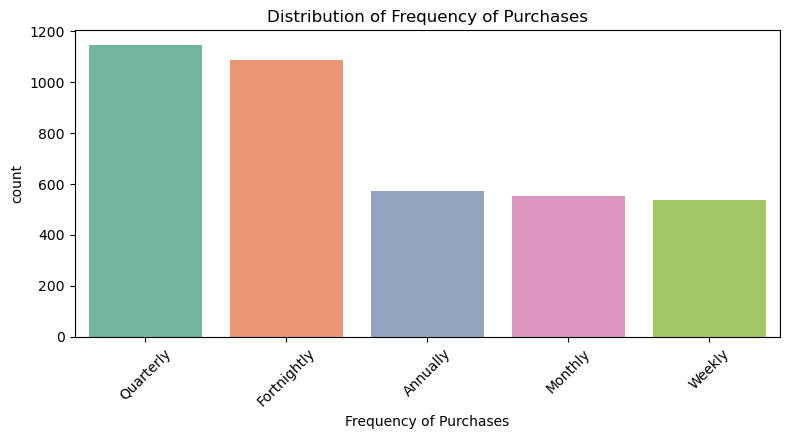

In [145]:
#looping visualization and ordered by the highest
for col in df.columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        order = df[col].value_counts().index
        sns.countplot(x=col,
                      data=df,
                      order=order,
                      palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[col],
                     kde=True,
                     bins=30,
                     color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
    
    plt.show()


## Bivariate and Multivariate

### Location analysis

In [146]:
# descriptive statistics to describe which location purchase the most

country_purchase = df.groupby('Location')['Purchase Amount (USD)'].agg(['mean', 'median', 'sum'])

In [147]:
#Which top 5 location generate highest total purchase amount?

sorted_country_by_sum = country_purchase.sort_values(by='sum', ascending=False)
sorted_country_by_sum.head(5)

mean  median   sum
Location                           
Montana     60.250000    64.0  5784
Illinois    61.054348    65.0  5617
California  59.000000    57.0  5605
Idaho       60.075269    62.0  5587
Nevada      63.379310    66.0  5514

In [148]:
# Which locations have the highest average purchase amount?

sorted_country_by_avg = country_purchase.sort_values(by='mean', ascending=False)
sorted_country_by_avg.head()

mean  median   sum
Location                              
Alaska         67.597222    68.5  4867
Pennsylvania   66.567568    70.0  4926
Arizona        66.553846    68.0  4326
West Virginia  63.876543    66.0  5174
Nevada         63.379310    66.0  5514

/var/folders/08/6_gsz4sn6q174rp19r5phdw80000gn/T/ipykernel_37188/502239644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_country_by_sum['sum'],


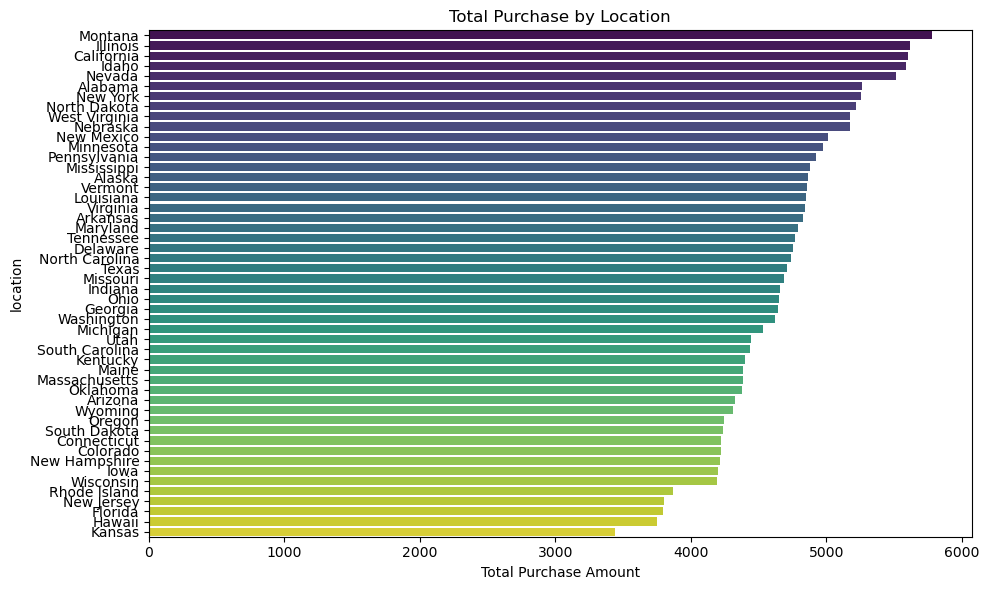

In [149]:
plt.figure(figsize= (10,6))
sns.barplot(x=sorted_country_by_sum['sum'],
            y=sorted_country_by_sum.index,
            palette='viridis')
plt.title('Total Purchase by Location')
plt.xlabel('Total Purchase Amount')
plt.ylabel('location')
plt.tight_layout()
plt.show()

In [150]:
# percentage

loc_purchase = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
loc_percentage = (loc_purchase / loc_purchase.sum()) * 100
loc_percentage_sorted = loc_percentage.sort_values(ascending=True)
loc_percentage.head(10)

Location
Montana          2.481541
Illinois         2.409892
California       2.404743
Idaho            2.397021
Nevada           2.365701
Alabama          2.257155
New York         2.255439
North Dakota     2.239565
West Virginia    2.219829
Nebraska         2.218971
Name: Purchase Amount (USD), dtype: float64

In [151]:
loc_purchase = df.groupby('Location')['Purchase Amount (USD)'].sum()


top10_locs = loc_purchase.sort_values(ascending=False).head(10).index


df_top10 = df[df['Location'].isin(top10_locs)]

location_summary = df_top10.groupby('Location').agg({
    'Purchase Amount (USD)': 'sum',
    'Age': lambda x: x.mode().iloc[0],
    'Gender': lambda x: x.mode().iloc[0],
    'Item Purchased': lambda x: x.mode().iloc[0],
    'Season': lambda x: x.mode().iloc[0]
}).rename(columns={
    'Purchase Amount (USD)': 'Total Purchase',
    'Age': 'Most Common Age',
    'Gender': 'Most Common Gender',
    'Item Purchased': 'Top Item Purchased',
    'Season': 'Most Frequent Season'
}).sort_values(by='Total Purchase', ascending=False)

location_summary.reset_index(inplace=True)


In [152]:
def gender_distribution(x):
    return x.value_counts(normalize=True).mul(100).round(1).to_dict()

def age_bins(x):
    bins = pd.cut(x, bins=[0, 30, 50, 100], labels=['<30', '30–50', '>50'])
    return bins.value_counts(normalize=True).mul(100).round(1).to_dict()

enhanced_summary = df.groupby('Location').agg({
    'Purchase Amount (USD)': 'sum',
    'Age': [lambda x: x.mean().round(1), age_bins],
    'Gender': gender_distribution,
    'Item Purchased': lambda x: x.mode().iloc[0],
    'Season': lambda x: x.mode().iloc[0]
})


In [153]:
behavioral_summary = df.groupby('Location').agg({
    'Review Rating': 'mean',
    'Previous Purchases': 'mean',
    'Promo Code Used': lambda x: (x == 'Yes').mean() *  100,
    'Subscription Status': lambda x: (x == 'Active').mean() * 100
}).rename(columns={
    'Review Rating': 'Avg Rating',
    'Previous Purchases': 'Avg Prev Purchases',
    'Promo Code Used': '% Using Promo Code',
    'Subscription Status': '% Active Subscribers'
}).round(1)


In [154]:
full_summary = location_summary.merge(behavioral_summary, on='Location')
full_summary

Location  Total Purchase  Most Common Age Most Common Gender  \
0        Montana            5784               52               Male   
1       Illinois            5617               27               Male   
2     California            5605               58               Male   
3          Idaho            5587               46               Male   
4         Nevada            5514               24               Male   
5        Alabama            5261               49               Male   
6       New York            5257               19               Male   
7   North Dakota            5220               20               Male   
8  West Virginia            5174               19               Male   
9       Nebraska            5172               19               Male   

  Top Item Purchased Most Frequent Season  Avg Rating  Avg Prev Purchases  \
0               Coat               Summer         3.8                25.3   
1              Shirt               Spring         3.6                26.6   
2              Dress                 Fall         3.8                24.5   
3               Belt               Spring         3.8                24.2   
4           Backpack               Spring         3.7                26.0   
5            Jewelry                 Fall         3.8                27.4   
6             Gloves                 Fall         3.7                24.2   
7             Jacket               Summer         3.8                23.8   
8               Coat               Spring         3.6                23.6   
9           Backpack               Spring         3.7                24.8   

   % Using Promo Code  % Active Subscribers  
0                37.5                   0.0  
1                40.2                   0.0  
2                42.1                   0.0  
3                40.9                   0.0  
4                47.1                   0.0  
5                40.4                   0.0  
6                41.4                   0.0  
7                45.8                   0.0  
8                49.4                   0.0  
9                42.5                   0.0

- among the top 10 location, male customers dominate the purchase
- significant segment of young buyers (<= 20) in location: New York, North Dakota, West Virginia and Nebraska
- older buyers significantly purchase in california (58), and montana (52)
- top items purchased in the top 10 location are varied from coat, shirt dest and many more
- customers have made around 24–27 previous purchases on average, indicating a loyal customer base across locations
- promo code between 37.5%-49.4%
- subscription adoption is underperform, 0%

In [155]:
# 10 lowest review rating location

low_rating_location = df.groupby('Location')['Review Rating'].mean().round(2).sort_values(ascending=True).reset_index()
low_rating_location.head(10)

Location  Review Rating
0  West Virginia           3.58
1  New Hampshire           3.61
2       Oklahoma           3.61
3        Georgia           3.62
4       Illinois           3.64
5         Hawaii           3.67
6           Utah           3.68
7   South Dakota           3.68
8        Florida           3.68
9        Wyoming           3.69

In [156]:
# 10 lowest review rating location by median

low_rating_location = df.groupby('Location')['Review Rating'].median().sort_values(ascending=True).reset_index()
low_rating_location.head(10)

Location  Review Rating
0  West Virginia           3.50
1  New Hampshire           3.50
2        Georgia           3.60
3           Utah           3.60
4   South Dakota           3.60
5       Oklahoma           3.60
6         Hawaii           3.60
7       Illinois           3.60
8        Florida           3.65
9       Nebraska           3.70

those 10 locations sorted by mean and median suggest that company should improve its performance 

## Gender Analysis

In [157]:
gender_percent = (df['Gender'].value_counts(normalize=True) * 100).round(2)
gender_percent

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64

In [158]:
# promo

promo_by_gender = (
    df.groupby('Gender')['Promo Code Used'].value_counts(normalize=True).
    unstack().
    fillna(0) * 100
).round(2)

promo_by_gender

Promo Code Used      No    Yes
Gender                        
Female           100.00   0.00
Male              36.76  63.24

- interestingly, female do not use promo code to purchase
- male far more likely to use promo

In [159]:
# let us see through statistical test whether the different is significant or njust due to chance


contingency_table = pd.crosstab(df['Gender'], df['Promo Code Used'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print('chi-square:', chi2)
print('p-value', p)

chi-square: 1381.9413463923058
p-value 1.7645380691667686e-302


we may conclude that since p-value is extremely small below 0.05 alpha, we can say:
  - there is statistically significant association between gender and promo code usage. 
  - the difference is not due to random chance

therefore, male is much more likely to use promo codes than female in this dataset and this difference is statistically significant. 

In [160]:
#how about subscription status by gende

subs_by_gender = (df.groupby('Gender')['Subscription Status'].value_counts(normalize=True).unstack().fillna(0) * 100).round(2)
subs_by_gender

Subscription Status      No    Yes
Gender                            
Female               100.00   0.00
Male                  60.29  39.71

- female is neither use code nor subscribe
- male subscription rate: 40%

In [161]:
# let us again see through statistical test whether the different is significant or just due to chance


contingency_table_gender_subscribe = pd.crosstab(df['Gender'], df['Subscription Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table_gender_subscribe)
print('chi-square:', chi2)
print('p-value', p)

chi-square: 676.7944035612919
p-value 3.3268630006040623e-149


p-value is quite low. thus, the difference is statistically significant

In [162]:
# how do we analyze gender in term of preference:

ship_by_gender = (df.groupby('Gender')['Shipping Type'].value_counts(normalize=True).unstack().fillna(0) * 100).round(0)
ship_by_gender

Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Gender                                                                          
Female                   17.0     16.0           20.0          15.0      17.0   
Male                     16.0     17.0           16.0          17.0      17.0   

Shipping Type  Store Pickup  
Gender                       
Female                 16.0  
Male                   17.0

- no big difference, but female slightly prefer free shipping with 20%

In [163]:
# let us again see through statistical test whether the different is significant or just due to chance


contingency_table_gender_shipping = pd.crosstab(df['Gender'], df['Shipping Type'])

chi2, p, dof, expected = chi2_contingency(contingency_table_gender_shipping)
print('chi-square:', chi2)
print('p-value', p)

chi-square: 12.242857409177802
p-value 0.03160742064222474


There is a statistically significant association between gender and shipping type choice. In other words, males and females prefer different shipping types in a way that is unlikely to be due to chance.

In [164]:
pd.crosstab([df['Gender'], df['Shipping Type']], df['Payment Method'], normalize='index').mul(100).round(2)


Payment Method         Bank Transfer   Cash  Credit Card  Debit Card  PayPal  \
Gender Shipping Type                                                           
Female 2-Day Shipping          15.94  20.29        19.32       12.08   14.49   
       Express                 14.95  13.40        17.53       16.49   19.59   
       Free Shipping           15.66  17.27        18.88       16.06   18.88   
       Next Day Air            16.75  16.75        12.57       15.18   21.99   
       Standard                14.08  19.72        19.72       15.49   15.49   
       Store Pickup            20.62  13.92        18.56       11.34   15.98   
Male   2-Day Shipping          15.48  13.81        19.76       16.19   18.81   
       Express                 13.72  18.14        17.70       14.60   20.13   
       Free Shipping           14.55  18.31        14.08       18.08   17.84   
       Next Day Air            18.60  15.75        18.38       16.63   14.00   
       Standard                14.29  17.23        16.55       19.27   16.78   
       Store Pickup            15.79  20.18        14.91       18.20   15.79   

Payment Method         Venmo  
Gender Shipping Type          
Female 2-Day Shipping  17.87  
       Express         18.04  
       Free Shipping   13.25  
       Next Day Air    16.75  
       Standard        15.49  
       Store Pickup    19.59  
Male   2-Day Shipping  15.95  
       Express         15.71  
       Free Shipping   17.14  
       Next Day Air    16.63  
       Standard        15.87  
       Store Pickup    15.13

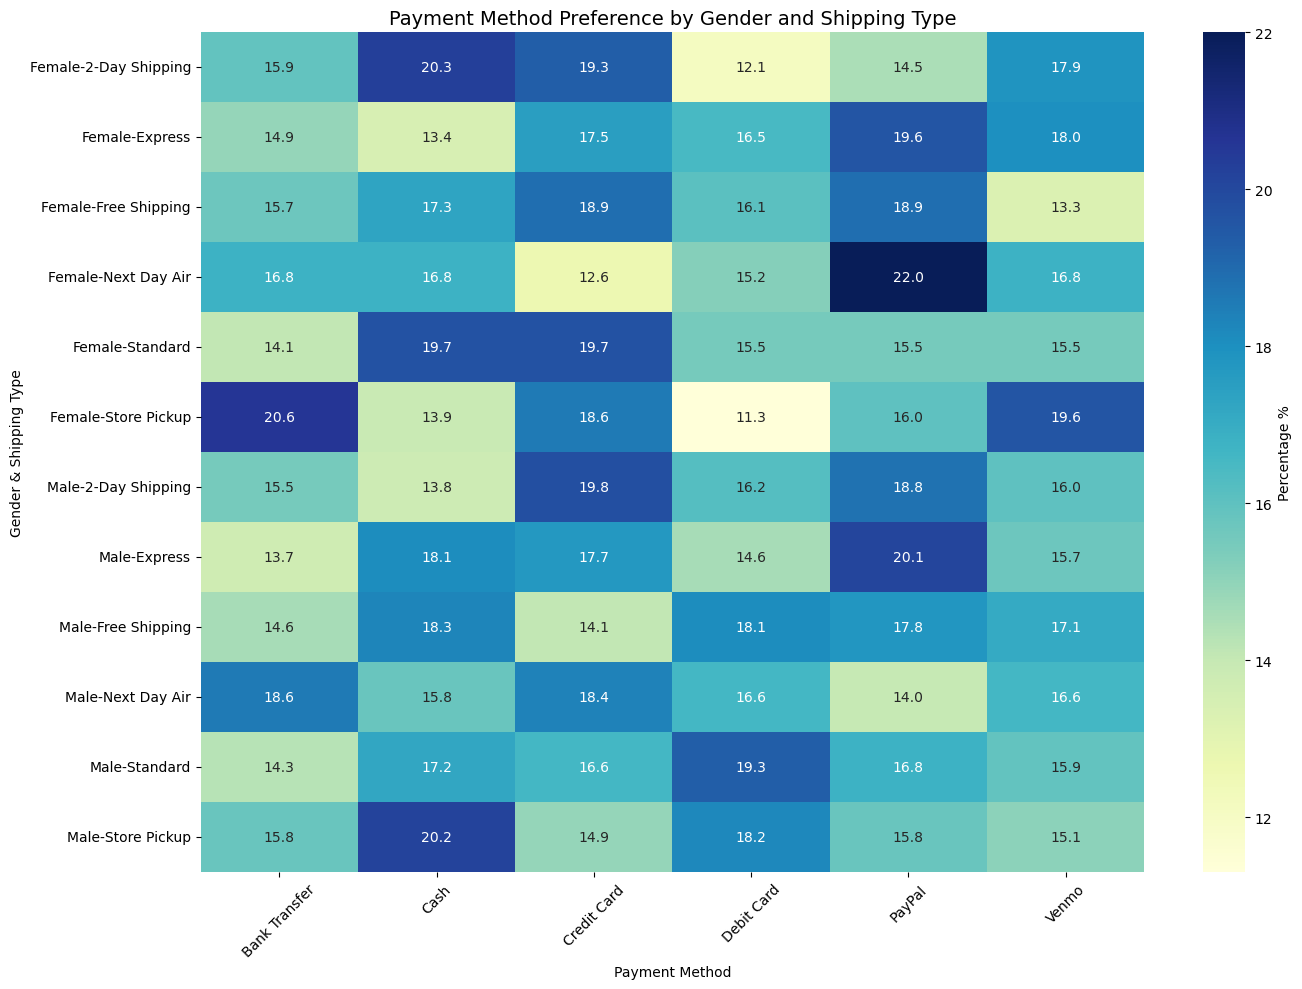

In [165]:
cross_tab = pd.crosstab(
    [df['Gender'], df['Shipping Type']],
    df['Payment Method'],
    normalize='index'
) * 100

cross_tab = cross_tab.round(1)

plt.figure(figsize=(14, 10))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage %'})
plt.title("Payment Method Preference by Gender and Shipping Type", fontsize=14)
plt.ylabel("Gender & Shipping Type")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


there are approx 5 type of customers when payment method percentage above 20% in term of gender and shipping type, although not significant:
- male that store pick up and cash
- male express, paypal
- female-store pickup bank transfer
- female next day air, paypal
- female 2 day shipping cash

In [166]:
ct = pd.crosstab(
    [df['Gender'], df['Shipping Type']],
    df['Payment Method']
)

chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi-square: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-square: 55.296971511675885
p-value: 0.46340672673772854
Degrees of freedom: 55


Turns out, payment method selection patterns by consumer gender and shipping tend not to be significantly influenced by gender and shipping type.

In [167]:
## product preference by gender: which category do male/female purchase most, and which product

product_frequently_purchased = df.groupby('Gender')['Item Purchased'].agg(lambda x: x.mode()[0])
product_frequently_purchased

Gender
Female    Blouse
Male       Pants
Name: Item Purchased, dtype: object

In [168]:
# top 3

top_items = (
    df.groupby('Gender')['Item Purchased']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename('Percentage')
    .reset_index()
    .groupby('Gender')
    .head(3)
)

top_items

Gender Item Purchased  Percentage
0   Female         Blouse        5.29
1   Female        Sandals        4.73
2   Female          Shirt        4.73
25    Male          Pants        4.64
26    Male        Jewelry        4.49
27    Male           Coat        4.30

in term of business, retailers might tailor promotions and inventory based on above. for example, they promote seasonal blouse and sandals for woman, or bundling coal-jewelry for male

In [169]:
#let us do another multivariate analysis

item_gender_season = (
    df.groupby(['Gender', 'Season', 'Item Purchased']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
)
item_gender_season

Gender  Season Item Purchased  Count
110    Male    Fall         Jacket     38
188    Male  Winter          Pants     37
163    Male  Summer          Pants     36
162    Male  Summer        Jewelry     35
167    Male  Summer          Shoes     35
..      ...     ...            ...    ...
17   Female    Fall          Shoes      7
38   Female  Spring          Pants      7
33   Female  Spring            Hat      7
75   Female  Winter       Backpack      6
86   Female  Winter          Jeans      5

[200 rows x 4 columns]

- in fall, be prepared, jacket is the most frequently purchased item

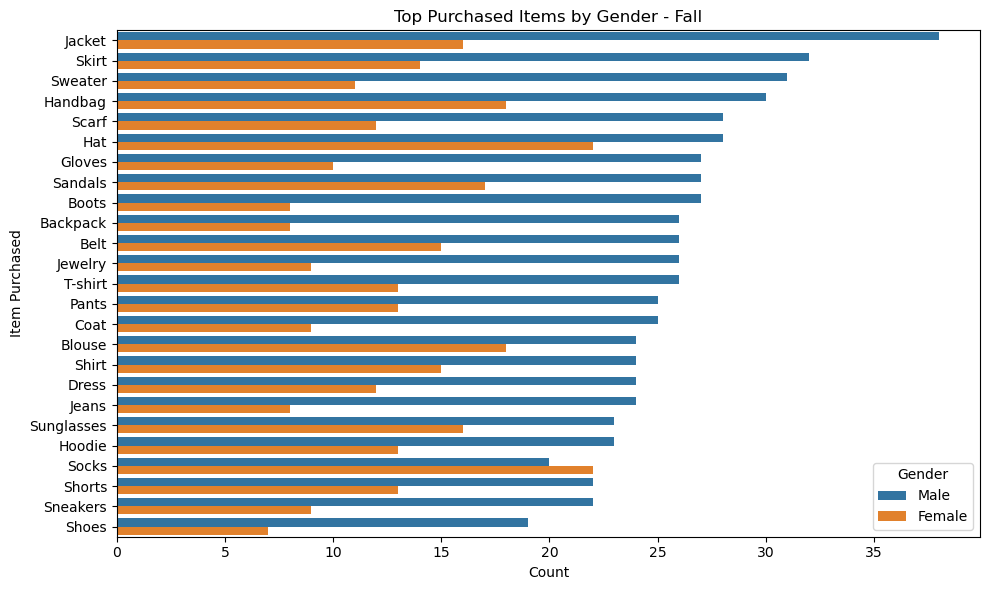

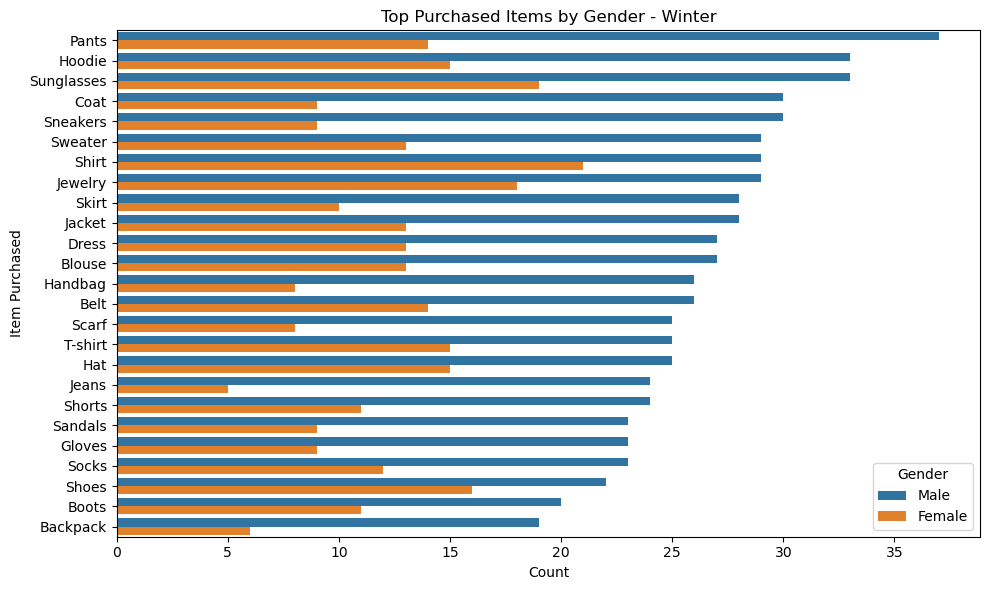

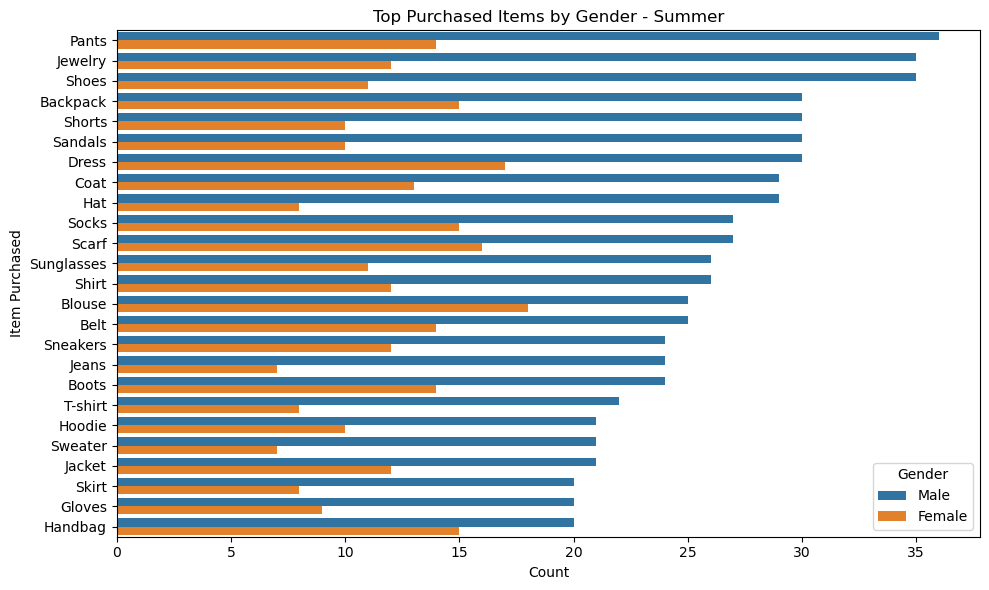

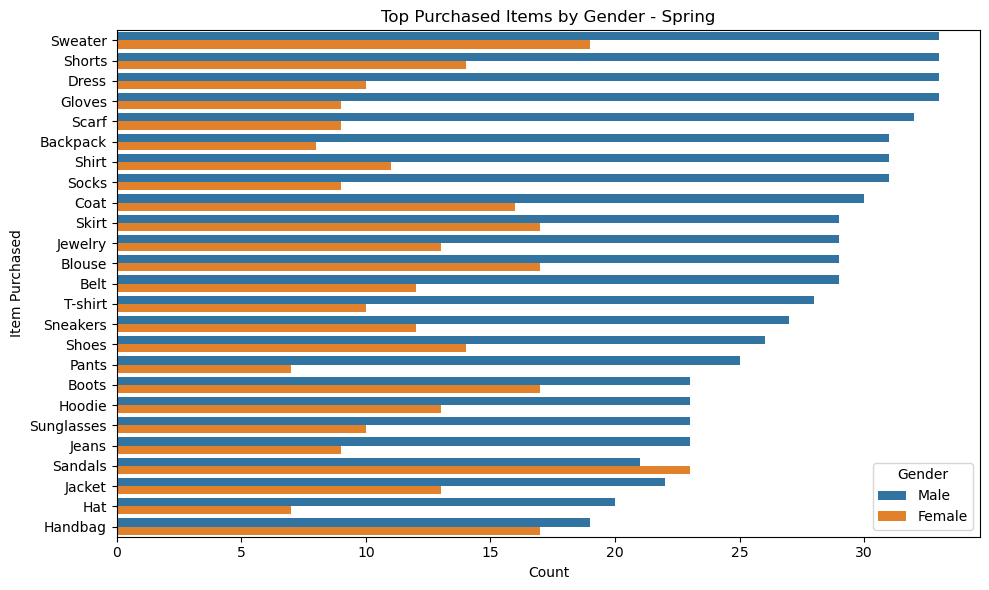

In [170]:
seasons = item_gender_season['Season'].unique()

for season in seasons:
    subset = item_gender_season[item_gender_season['Season'] == season].copy()
    
    #to sort from the highest count
    subset = subset.sort_values('Count', ascending=False)
    
    # to make it ordered
    subset['Item Purchased'] = pd.Categorical(subset['Item Purchased'], 
                                               categories=subset['Item Purchased'].unique(), 
                                               ordered=True)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, 
                x='Count', 
                y='Item Purchased', 
                hue='Gender', 
                dodge=True)
    
    plt.title(f"Top Purchased Items by Gender - {season}")
    plt.xlabel("Count")
    plt.ylabel("Item Purchased")
    plt.tight_layout()
    plt.show()


- during fall:
     - male purchased jackets the most
     - female purchased hat and shocks
- during summer:
    - male most purchased: pants, jewelry, shoes
    - female most purchased: blouse
- during winter:
    - male most purchased: pants, hoodie, sunglasses
    - woman most purchased: shirt
- during spring:
    - male most purchased: short, sweater,dress, gloves
    - female most purchased: sandals



In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [172]:
#outlier checking

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric = df[numeric_cols]

# IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# upper and lower bound definition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outlier
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
outlier_data = df[outliers]

print("Data Outlier (Metode IQR):")
print(outlier_data)


Data Outlier (Metode IQR):
Empty DataFrame
Columns: [Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


no outlier at all

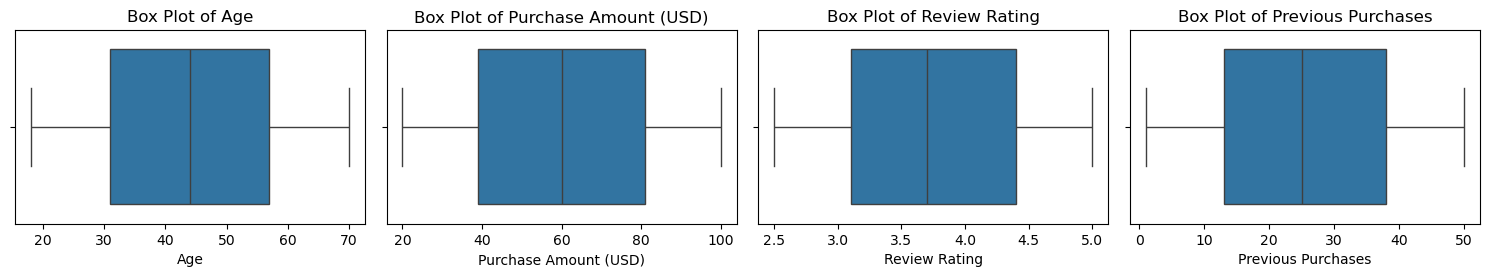

In [173]:
# to make sure by visualization

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [174]:
for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())
    if p > 0.05:
        print(f"{col}: ✅ Normally distributed (p = {p:.4f})")
    else:
        print(f"{col}: ❌ Not normally distributed (p = {p:.4f})")

Age: ❌ Not normally distributed (p = 0.0000)
Purchase Amount (USD): ❌ Not normally distributed (p = 0.0000)
Review Rating: ❌ Not normally distributed (p = 0.0000)
Previous Purchases: ❌ Not normally distributed (p = 0.0000)


In [175]:
#data is not normal, to correlate I am going to use spearman
matrix_cor = df_numeric.corr(method='spearman').round(2)
matrix_cor

Age  Purchase Amount (USD)  Review Rating  \
Age                    1.00                  -0.01          -0.02   
Purchase Amount (USD) -0.01                   1.00           0.03   
Review Rating         -0.02                   0.03           1.00   
Previous Purchases     0.04                   0.01           0.00   

                       Previous Purchases  
Age                                  0.04  
Purchase Amount (USD)                0.01  
Review Rating                        0.00  
Previous Purchases                   1.00

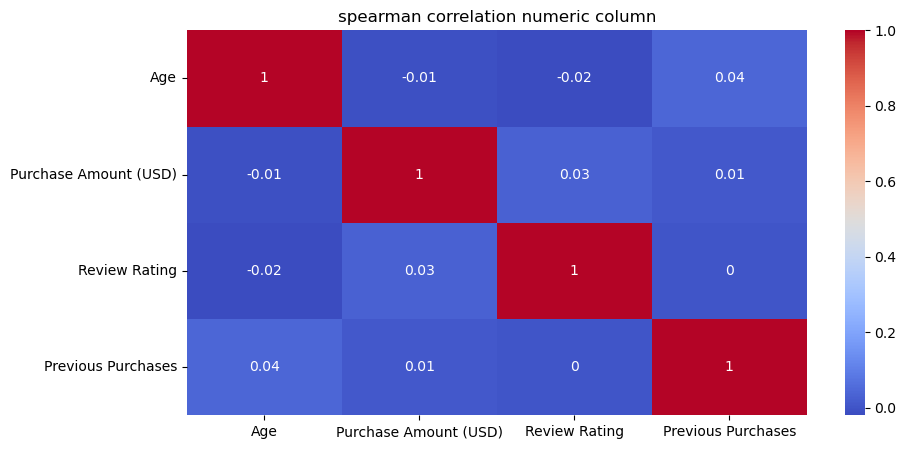

In [176]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix_cor, annot=True, cmap='coolwarm')
plt.title('spearman correlation numeric column')
plt.show()

no strong correlation among numerical categories

In [177]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

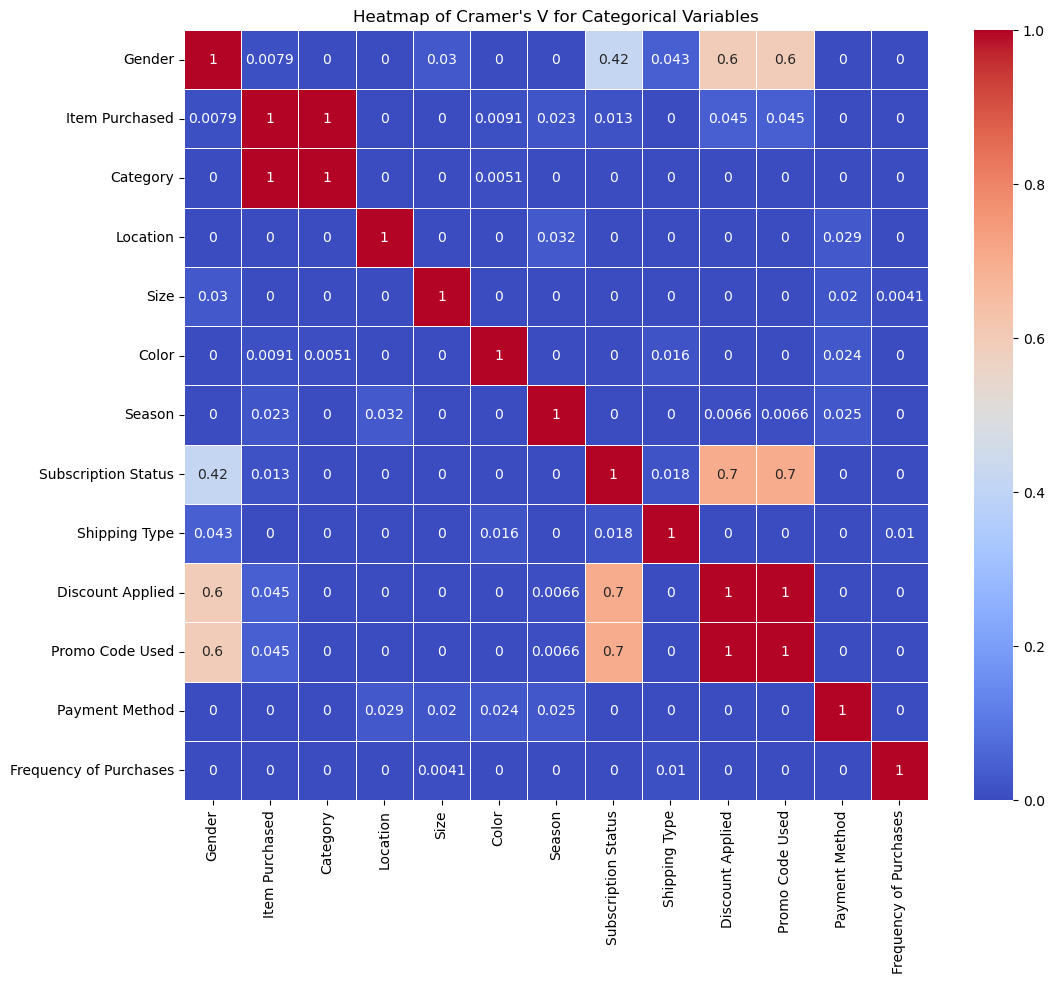

In [178]:
categorical_cols = df.select_dtypes(include=['object']).columns

#making matrix
num_vars = len(categorical_cols)
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# fii the matrix
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), 
            annot=True, cmap="coolwarm", 
            linewidths=.5)
plt.title("Heatmap of Cramer's V for Categorical Variables")
plt.show()


The categorical variables largely show very low associations with each other. Key findings include:
- Gender has a moderate association with discount application, promo code usage, and subscription status, but near-zero association with all other variables. This suggests that one cannot reliably predict purchase behavior based solely on gender.
- Location also demonstrates minimal association with purchase preferences or customer purchase behavior, indicating that these are relatively consistent across different locations.
- There is little to no association among discount application, color preference, and season, implying that these variables cannot be used to accurately predict one another.
- Payment method exhibits low association with the other variables, suggesting that customers' payment choices are largely independent of their product preferences or demographics.
- Just like Item Purchased and Category columns (association=1), Discount Applied and Promo Code Used are highly redundant. When performing clustering, it's advisable to avoid using both variables together

## Customer Clustering

### Preprocessing

In [179]:
features = [
    'Gender',
    'Item Purchased',
    'Location',
    'Shipping Type',
    'Payment Method',
    'Frequency of Purchases',
    'Subscription Status',
    'Age',
    'Purchase Amount (USD)',
    'Size'
]


In [180]:
df_cluster = df[features].copy()

In [181]:
df_cluster

Gender Item Purchased       Location   Shipping Type Payment Method  \
0       Male         Blouse       Kentucky         Express          Venmo   
1       Male        Sweater          Maine         Express           Cash   
2       Male          Jeans  Massachusetts   Free Shipping    Credit Card   
3       Male        Sandals   Rhode Island    Next Day Air         PayPal   
4       Male         Blouse         Oregon   Free Shipping         PayPal   
...      ...            ...            ...             ...            ...   
3895  Female         Hoodie       Virginia  2-Day Shipping          Venmo   
3896  Female       Backpack           Iowa    Store Pickup  Bank Transfer   
3897  Female           Belt     New Jersey        Standard          Venmo   
3898  Female          Shoes      Minnesota         Express          Venmo   
3899  Female        Handbag     California    Store Pickup          Venmo   

     Frequency of Purchases Subscription Status  Age  Purchase Amount (USD)  \
0               Fortnightly                 Yes   55                     53   
1               Fortnightly                 Yes   19                     64   
2                    Weekly                 Yes   50                     73   
3                    Weekly                 Yes   21                     90   
4                  Annually                 Yes   45                     49   
...                     ...                 ...  ...                    ...   
3895                 Weekly                  No   40                     28   
3896            Fortnightly                  No   52                     49   
3897              Quarterly                  No   46                     33   
3898                 Weekly                  No   44                     77   
3899              Quarterly                  No   52                     81   

     Size  
0       L  
1       L  
2       S  
3       M  
4       M  
...   ...  
3895    L  
3896    L  
3897    L  
3898    S  
3899    M  

[3900 rows x 10 columns]

In [182]:
#will make some different encoding methods where size would be made in ordinal encoder and the rest categorical data: one hot encoder

size_categories = ['S', 'M', 'L', 'XL']
if 'Size' in df_cluster.columns:
    ordinal_encoder = OrdinalEncoder(categories=[size_categories], 
                                     handle_unknown='use_encoded_value', 
                                     unknown_value=-1) # Handle unknown sizes
    df_cluster['Size_Encoded'] = ordinal_encoder.fit_transform(df_cluster[['Size']])
    features_to_encode = [col for col in features if col != 'Size']
else:
    features_to_encode = features

In [183]:
#one hot

encoder = OneHotEncoder(handle_unknown='ignore', 
                        sparse_output=False)
encoded_data = encoder.fit_transform(df_cluster[features_to_encode])
encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(features_to_encode))

In [184]:
#one hot returns array without index, the info about it will lost. 
#to escape from error and match from the origin column, add index
encoded_df.index = df_cluster.index

In [185]:
encoded_df

Gender_Female  Gender_Male  Item Purchased_Backpack  \
0               0.0          1.0                      0.0   
1               0.0          1.0                      0.0   
2               0.0          1.0                      0.0   
3               0.0          1.0                      0.0   
4               0.0          1.0                      0.0   
...             ...          ...                      ...   
3895            1.0          0.0                      0.0   
3896            1.0          0.0                      1.0   
3897            1.0          0.0                      0.0   
3898            1.0          0.0                      0.0   
3899            1.0          0.0                      0.0   

      Item Purchased_Belt  Item Purchased_Blouse  Item Purchased_Boots  \
0                     0.0                    1.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    1.0                   0.0   
...                   ...                    ...                   ...   
3895                  0.0                    0.0                   0.0   
3896                  0.0                    0.0                   0.0   
3897                  1.0                    0.0                   0.0   
3898                  0.0                    0.0                   0.0   
3899                  0.0                    0.0                   0.0   

      Item Purchased_Coat  Item Purchased_Dress  Item Purchased_Gloves  \
0                     0.0                   0.0                    0.0   
1                     0.0                   0.0                    0.0   
2                     0.0                   0.0                    0.0   
3                     0.0                   0.0                    0.0   
4                     0.0                   0.0                    0.0   
...                   ...                   ...                    ...   
3895                  0.0                   0.0                    0.0   
3896                  0.0                   0.0                    0.0   
3897                  0.0                   0.0                    0.0   
3898                  0.0                   0.0                    0.0   
3899                  0.0                   0.0                    0.0   

      Item Purchased_Handbag  ...  Purchase Amount (USD)_91  \
0                        0.0  ...                       0.0   
1                        0.0  ...                       0.0   
2                        0.0  ...                       0.0   
3                        0.0  ...                       0.0   
4                        0.0  ...                       0.0   
...                      ...  ...                       ...   
3895                     0.0  ...                       0.0   
3896                     0.0  ...                       0.0   
3897                     0.0  ...                       0.0   
3898                     0.0  ...                       0.0   
3899                     1.0  ...                       0.0   

      Purchase Amount (USD)_92  Purchase Amount (USD)_93  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
3895                       0.0                       0.0   
3896                       0.0                       0.0   
3897                       0.0                       0.0   
3898                       0.0                       0.0   
3899                       0.0                       0.0   

      Purchase Am

In [186]:
# join encoded feature
if 'Size_Encoded' in df_cluster.columns:
    X = pd.concat([df_cluster[['Size_Encoded']].reset_index(drop=True), encoded_df], axis=1)
else:
    X = encoded_df

In [187]:
# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimentionality Reduction by PCA

In [188]:
# reduce dimension by PCA, let us decide 0.95 because we need to keep most of information there while reduce dimension
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [189]:
display(X_pca)

array([[-2.28773731,  2.55682158, -0.61369901, ..., -0.67331498,
         0.38947647, -0.24805433],
       [-2.36274862,  2.0796487 ,  0.97246782, ..., -0.87815184,
        -0.23270005,  1.04736114],
       [-2.47169152, -0.60362264, -0.97302006, ...,  0.54107972,
         0.83142776,  0.41817648],
       ...,
       [ 2.1421951 , -0.74053736,  0.13675284, ...,  0.62654293,
        -0.2159382 , -0.04330101],
       [ 2.12921854,  0.3719482 , -1.58339513, ..., -0.49669628,
        -0.80139329, -0.49348082],
       [ 2.22777407, -0.8203944 ,  0.8029338 , ...,  1.04139006,
        -0.13251395, -0.75003304]])

### Deciding Number of Cluster

#### Kmeans - Elbow

In [190]:
#clustering

inertia = []
range_cluster = range(2,11)
for i in range_cluster:
    kmeans = KMeans(n_clusters=i,
                    random_state=42,
                    n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


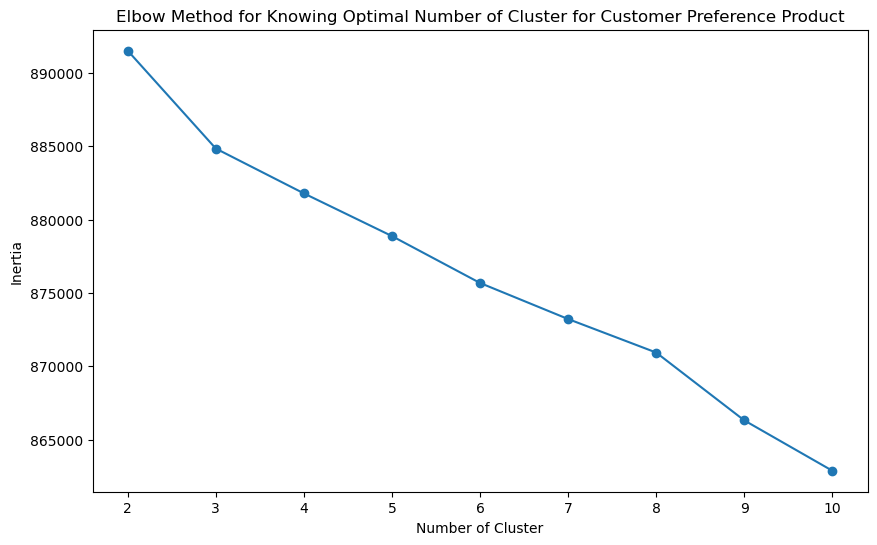

In [191]:
plt.figure(figsize=(10,6))
plt.plot(range_cluster, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Knowing Optimal Number of Cluster for Customer Preference Product')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

n_cluster = 3

In [192]:
best_cluster = 3
kmeans_best = KMeans(n_clusters=best_cluster, random_state=42, n_init=10)
df['cluster_preference'] = kmeans_best.fit_predict(X_scaled)

In [193]:
#save label cluster
df['cluster_preference'] = kmeans_best.labels_

In [194]:
df['cluster_preference'].value_counts()


cluster_preference
2    1599
0    1248
1    1053
Name: count, dtype: int64

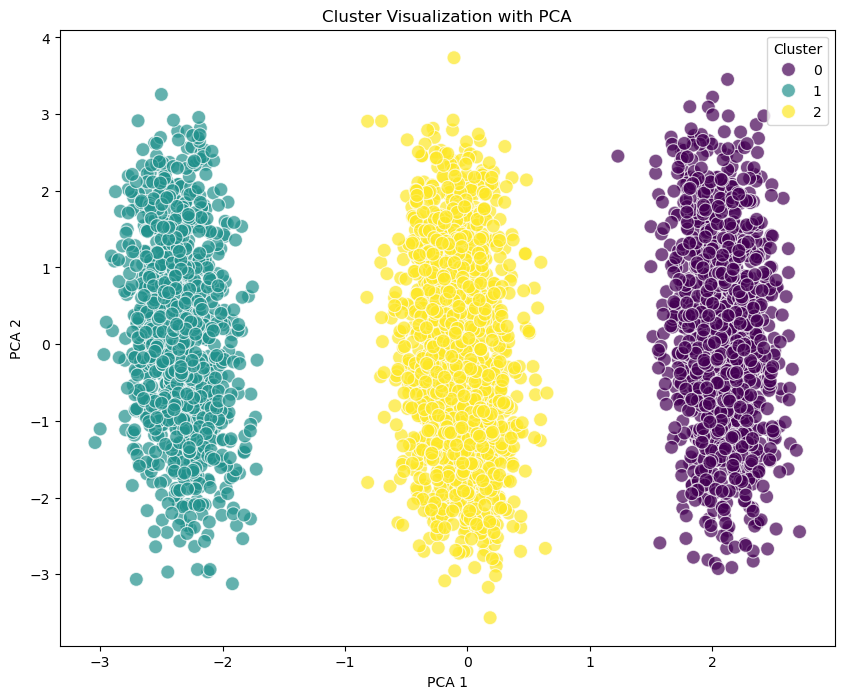

In [195]:
#visualizing with 2 PCA columns, column first (0) and second (1)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='cluster_preference', 
    palette='viridis', 
    data=df,
    s=100,
    alpha=0.7
)
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [196]:
def summarize_clusters(df, cluster_col, features):
    summary = {}

    for cluster in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster]
        summary[cluster] = {}
        
        for feature in features:
            top_value = cluster_data[feature].value_counts().idxmax()
            top_ratio = cluster_data[feature].value_counts(normalize=True).max()
            summary[cluster][feature] = f"{top_value} ({top_ratio:.1%})"
    
    return pd.DataFrame(summary).T


In [197]:
summary_df = summarize_clusters(df, cluster_col='cluster_preference', features=features)
display(summary_df)

Gender  Item Purchased        Location          Shipping Type  \
0  Female (100.0%)   Blouse (5.3%)  Montana (3.0%)  Free Shipping (20.0%)   
1    Male (100.0%)  Sweater (4.9%)   Nevada (2.8%)        Express (18.0%)   
2    Male (100.0%)   Blouse (4.8%)  Vermont (2.6%)   Next Day Air (18.1%)   

        Payment Method Frequency of Purchases Subscription Status        Age  \
0  Credit Card (17.9%)      Quarterly (28.4%)         No (100.0%)  45 (2.6%)   
1   Debit Card (18.0%)      Quarterly (27.9%)        Yes (100.0%)  64 (2.7%)   
2         Cash (17.8%)      Quarterly (31.1%)         No (100.0%)  41 (2.6%)   

  Purchase Amount (USD)       Size  
0             82 (1.9%)  M (47.3%)  
1             90 (2.1%)  M (44.8%)  
2             23 (2.2%)  M (43.3%)

Cluster interpretation if needed:
- CLuster 0 = Quarterly Bargain-Seeking Women. These are mid-aged female shoppers who prefer low-cost shipping and shop quarterly, without subscription ties
    - marketing strategy:
        - Seasonal or quarterly deals email promotion like Spring sale or holiday offers

- Cluster 1 = Subscribed Senior Spenders. Older men with subscriptions, who spend more per transaction and prefer faster shipp
    - Marketing strategy:
        - website/app interface is senior-friendly like large button or simple check out
        - Promote higher-value items like sweaters, outerwear

- Cluster 2 = Young Impulsive Male Buyers. Younger males, pay in cash, fast shipping, low spend.
    - Marketing strategy:
        - Limited-time offers and “next day delivery” banners.
        - Ads via Instagram, TikTok, or WhatsApp with quick checkout links.
        - Promote lower-cost add-ons or “frequently bought together” combos.
        - Emphasize COD and fast delivery in marketing copy.

### Alternative Approaches

#### Kmeans - Silhouette, 3D PCA Visualization

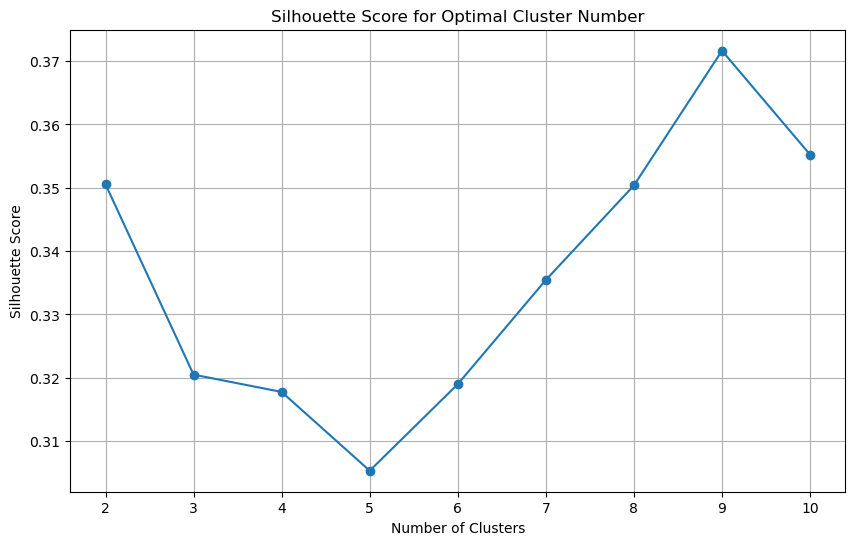

Gender  Item Purchased         Location           Shipping Type  \
0    Male (100.0%)     Coat (6.8%)  Kentucky (5.3%)        Standard (20.9%)   
1  Female (100.0%)  Sweater (6.8%)  Kentucky (5.2%)        Standard (20.0%)   
2    Male (100.0%)    Pants (7.0%)   Montana (4.4%)  2-Day Shipping (20.7%)   
3    Male (100.0%)    Pants (5.6%)  Missouri (3.8%)    Store Pickup (24.5%)   
4   Female (99.8%)    Dress (6.7%)   Georgia (4.3%)   Free Shipping (30.0%)   
5    Male (100.0%)    Skirt (6.1%)  Maryland (4.5%)   Free Shipping (21.7%)   
6    Male (100.0%)    Shirt (6.6%)    Nevada (5.6%)   Free Shipping (24.0%)   
7  Female (100.0%)   Blouse (6.3%)  Michigan (3.6%)    Store Pickup (21.4%)   
8    Male (100.0%)  Jewelry (6.5%)  Illinois (4.2%)    Next Day Air (22.9%)   

          Payment Method Frequency of Purchases Subscription Status  \
0     Debit Card (23.3%)    Fortnightly (78.2%)        Yes (100.0%)   
1          Venmo (18.8%)    Fortnightly (73.4%)         No (100.0%)   
2           Cash (23.2%)      Quarterly (82.8%)         No (100.0%)   
3  Bank Transfer (23.2%)      Quarterly (79.3%)        Yes (100.0%)   
4    Credit Card (29.6%)       Annually (32.2%)         No (100.0%)   
5    Credit Card (27.7%)       Annually (32.2%)         No (100.0%)   
6    Credit Card (26.0%)       Annually (33.6%)         Yes (99.7%)   
7           Cash (23.9%)      Quarterly (82.7%)         No (100.0%)   
8     Debit Card (20.8%)    Fortnightly (82.2%)         No (100.0%)   

         Age Purchase Amount (USD)       Size  
0  49 (4.4%)             90 (4.4%)  M (46.6%)  
1  26 (4.5%)             32 (4.2%)  M (48.5%)  
2  69 (5.4%)             23 (3.5%)  M (44.5%)  
3  69 (4.7%)             42 (3.4%)  M (38.9%)  
4  57 (3.7%)             82 (3.9%)  M (45.4%)  
5  41 (4.0%)             82 (2.8%)  M (44.3%)  
6  64 (5.6%)             39 (3.5%)  M (48.0%)  
7  22 (4.4%)             77 (3.0%)  M (48.1%)  
8  23 (4.4%)             68 (3.4%)  M (41.1%)

In [198]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Calculate Silhouette Scores
range_clusters = range(2, 11)
silhouette_scores = []
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

# Determining the best number of clusters and performing clustering
best_cluster = range_clusters[np.argmax(silhouette_scores)] # Select cluster with highest silhouette score
kmeans_best = KMeans(n_clusters=best_cluster, random_state=42, n_init=10)
df['cluster_preference'] = kmeans_best.fit_predict(X_pca)  # Use X_pca here

# Visualizing clustering results with PCA using Plotly
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]  # Add PCA3

fig_scatter = px.scatter_3d(
    df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='cluster_preference',
    title='3D Cluster Visualization with PCA',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'},
    hover_data=df.columns.tolist()  # Show all columns on hover
)
fig_scatter.show()

# Cluster Summary
summary_df = summarize_clusters(df, cluster_col='cluster_preference', features=features)
display(summary_df)


too many cluster, hard and take times to identify

## Aglomerative Clustering

In [199]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Define number of Agglomerative Clustering by my self
n_clusters = 4 
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, 
                                         linkage='ward')  # 'ward' linkage minimizes variance
df['cluster_preference'] = agg_clustering.fit_predict(X_pca)


# Visualizing clustering results with PCA using Plotly
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2] 

fig_scatter = px.scatter_3d(
    df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='cluster_preference',
    title='3D Cluster Visualization with PCA',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'},
    hover_data=df.columns.tolist()  # Show all columns on hover
)
fig_scatter.show()

# Cluster Summary
summary_df = summarize_clusters(df, cluster_col='cluster_preference', features=features)
display(summary_df)


Gender  Item Purchased              Location  \
0     Male (76.7%)    Pants (5.3%)       Michigan (2.8%)   
1    Male (100.0%)  Sweater (4.9%)         Nevada (2.8%)   
2     Male (62.1%)   Gloves (6.8%)  Massachusetts (4.7%)   
3  Female (100.0%)    Skirt (5.5%)       Maryland (4.1%)   

           Shipping Type       Payment Method Frequency of Purchases  \
0  Free Shipping (19.6%)         Cash (18.7%)      Quarterly (50.8%)   
1        Express (18.0%)   Debit Card (18.0%)      Quarterly (27.9%)   
2   Next Day Air (22.4%)   Debit Card (19.5%)    Fortnightly (88.2%)   
3  Free Shipping (23.0%)  Credit Card (23.9%)         Weekly (25.6%)   

  Subscription Status        Age Purchase Amount (USD)       Size  
0         No (100.0%)  69 (3.2%)             97 (2.2%)  M (44.9%)  
1        Yes (100.0%)  64 (2.7%)             90 (2.1%)  M (44.8%)  
2         No (100.0%)  26 (4.5%)             32 (3.5%)  M (44.7%)  
3         No (100.0%)  63 (3.8%)             82 (3.0%)  M (45.8%)

- Cluster 0 = Traditional Elder Men. Older male shoppers who purchase quarterly, prefer free shipping, and pay with cash.  
    - Marketing strategy:  
        - Highlight seasonal or quarterly promos  
        - Use offline or print-friendly ads (e.g. flyers or direct mail)  
        - Simplify payment flows and emphasize cash options  


- Cluster 1 = Subscribed Senior Spenders. Older men with subscriptions, quarterly shoppers, favor express shipping and debit cards, and spend more per item.  
    - Marketing strategy:  
        - Ensure senior-friendly website/app UX (large buttons, fewer steps)  
        - Promote higher-value items like sweaters, jackets  
        - Offer exclusive subscription discounts  


- Cluster 2 = Young Practical Buyers. Young male customers, frequent shoppers (fortnightly), low spend, value fast shipping and debit cards.  
    - Marketing strategy:  
        - Promote fast delivery and utility items  
        - Use targeted digital ads with quick checkout  
        - Introduce reward points or buy-more-save-more deals  


- Cluster 3 = Fashion-Driven Senior Women. Older females, weekly shoppers, prefer free shipping, credit cards, and spend moderately.  
    - Marketing strategy:  
        - Feature weekly fashion drops or curated styles  
        - Share lookbooks and styling tips via email or social media  
        - Provide VIP access or loyalty perks  

### Aglomerative Clustering - Dendogram

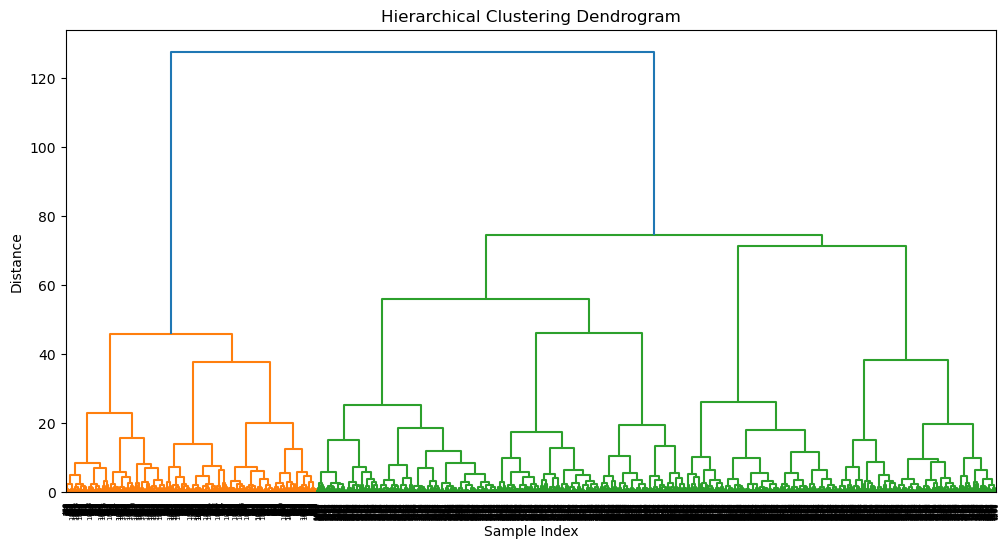

In [200]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# PCA 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Count linkage matrix
linkage_matrix = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


3

In [201]:
n_clusters = 3

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['cluster_preference'] = agg_clustering.fit_predict(X_pca)

# Adding PCA to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]

# Plotly
fig_scatter = px.scatter_3d(
    df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='cluster_preference',
    title='3D Cluster Visualization with PCA',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'},
    hover_data=df.columns.tolist()
)
fig_scatter.show()

summary_df = summarize_clusters(df, cluster_col='cluster_preference', features=features)
display(summary_df)


Gender  Item Purchased         Location          Shipping Type  \
0  Female (68.4%)   Blouse (4.9%)  Illinois (2.9%)       Standard (19.5%)   
1   Male (100.0%)  Sweater (4.9%)    Nevada (2.8%)        Express (18.0%)   
2    Male (76.7%)    Pants (5.3%)  Michigan (2.8%)  Free Shipping (19.6%)   

       Payment Method Frequency of Purchases Subscription Status        Age  \
0       Venmo (18.9%)    Fortnightly (54.5%)         No (100.0%)  26 (2.9%)   
1  Debit Card (18.0%)      Quarterly (27.9%)        Yes (100.0%)  64 (2.7%)   
2        Cash (18.7%)      Quarterly (50.8%)         No (100.0%)  69 (3.2%)   

  Purchase Amount (USD)       Size  
0             32 (2.7%)  M (45.2%)  
1             90 (2.1%)  M (44.8%)  
2             97 (2.2%)  M (44.9%)

- Cluster 0: Young Independent Shoppers  
Mostly young female customers who shop fortnightly, don’t subscribe, prefer standard shipping, and pay with Venmo. They spend less per transaction.

    - Marketing strategy:  
        - Promote trendy, affordable items (e.g. blouses, tops)  
        - Use social media ads (Instagram, TikTok) targeting young women  
        - Offer loyalty points for repeat fortnightly purchases  
        - Include Venmo-exclusive cashback promos  

- Cluster 1: Subscribed Senior Spenders  
Older male subscribers who shop quarterly, prefer express shipping, pay with debit cards, and spend moderately high amounts per item.

    - Marketing strategy:  
        - Ensure senior-friendly digital interfaces (e.g. clear navigation)  
        - Promote seasonal collections (e.g. sweaters, jackets)  
        - Offer exclusive subscriber discounts or early access sales  
        - Highlight express shipping speed in campaigns  

- Cluster 2: Traditional Elder Men  
Older male non-subscribers who shop quarterly, prefer free shipping, pay with cash, and have the highest spend per item.

    - Marketing strategy:  
        - Emphasize quarterly or seasonal offers  
        - Use offline or simple marketing (e.g. flyers, direct mail)  
        - Highlight cash-on-delivery options  
        - Upsell premium basics (e.g. pants, shoes)


In [208]:
df[df['cluster_preference'] == 0]

Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
1053   59    Male         Blouse     Clothing                     70   
1056   20    Male        Sweater     Clothing                     64   
1060   27    Male        Sweater     Clothing                     35   
1066   49    Male           Coat    Outerwear                     96   
1072   48    Male         Shorts     Clothing                     92   
...   ...     ...            ...          ...                    ...   
3892   35  Female        Jewelry  Accessories                     86   
3893   21  Female            Hat  Accessories                     64   
3895   40  Female         Hoodie     Clothing                     28   
3896   52  Female       Backpack  Accessories                     49   
3898   44  Female          Shoes     Footwear                     77   

           Location Size      Color  Season  Review Rating  ...  \
1053         Kansas    M       Blue  Spring            3.3  ...   
1056          Idaho    L      Black  Winter            2.9  ...   
1060           Iowa    S       Gray  Summer            2.6  ...   
1066    Mississippi    M        Red  Winter            4.0  ...   
1072          Idaho    L       Gold    Fall            3.5  ...   
...             ...  ...        ...     ...            ...  ...   
3892       Michigan    L     Indigo  Summer            3.5  ...   
3893  Massachusetts    L      White    Fall            3.3  ...   
3895       Virginia    L  Turquoise  Summer            4.2  ...   
3896           Iowa    L      White  Spring            4.5  ...   
3898      Minnesota    S      Brown  Summer            3.8  ...   

     Previous Purchases Payment Method Frequency of Purchases  \
1053                 10     Debit Card            Fortnightly   
1056                 42          Venmo            Fortnightly   
1060                 21     Debit Card              Quarterly   
1066                 11         PayPal            Fortnightly   
1072                 34     Debit Card            Fortnightly   
...                 ...            ...                    ...   
3892                  5         PayPal            Fortnightly   
3893                 29  Bank Transfer            Fortnightly   
3895                 32          Venmo                 Weekly   
3896                 41  Bank Transfer            Fortnightly   
3898                 24          Venmo                 Weekly   

     cluster_preference      PCA1      PCA2      PCA3  1  0  2  
1053                  0  0.599670  1.068109  0.721765  1  1  1  
1056                  0 -0.170248  1.607160  1.691918  1  1  1  
1060                  0 -0.336167 -0.124986  2.385507  1  1  1  
1066                  0 -0.266568  1.244383  1.235765  1  1  1  
1072                  0  0.017628  1.929939  0.432702  1  1  1  
...                 ...       ...       ...       ... .. .. ..  
3892                  0  2.048505  1.795620 -2.053289  1  1  1  
3893                  0  1.601917  1.508730  2.268507  1  1  1  
3895                  0  2.227009  0.269001 -2.202435  1  1  1  
3896                  0  1.942542  1.397973  1.605469  1  1  1  
3898                  0  2.129219  0.371948 -1.583395  1  1  1  

[1296 rows x 24 columns]

In [218]:
df[df['cluster_preference'] == 0].describe().round(2)


Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
count  1296.00                1296.00        1296.00             1296.00   
mean     43.34                  59.52           3.74               24.47   
std      14.88                  23.95           0.72               14.45   
min      18.00                  20.00           2.50                1.00   
25%      30.00                  38.00           3.10               12.00   
50%      44.00                  59.00           3.70               24.00   
75%      56.00                  81.00           4.32               37.00   
max      70.00                 100.00           5.00               50.00   

       cluster_preference     PCA1     PCA2     PCA3       1       0       2  
count              1296.0  1296.00  1296.00  1296.00  1296.0  1296.0  1296.0  
mean                  0.0     1.38     0.91    -0.04     1.0     1.0     1.0  
std                   0.0     1.04     0.96     1.34     0.0     0.0     0.0  
min                   0.0    -0.82    -2.45    -4.02     1.0     1.0     1.0  
25%                   0.0     0.07     0.23    -0.97     1.0     1.0     1.0  
50%                   0.0     1.93     0.99    -0.07     1.0     1.0     1.0  
75%                   0.0     2.16     1.59     0.95     1.0     1.0     1.0  
max                   0.0     2.71     3.74     3.22     1.0     1.0     1.0

In [219]:
df[df['cluster_preference'] == 0].describe(include='object')


Gender Item Purchased  Category  Location  Size   Color  Season  \
count     1296           1296      1296      1296  1296    1296    1296   
unique       2             25         4        50     4      25       4   
top     Female         Blouse  Clothing  Illinois     M  Violet  Spring   
freq       886             64       577        38   586      67     341   

       Subscription Status Shipping Type Discount Applied Promo Code Used  \
count                 1296          1296             1296            1296   
unique                   1             6                2               2   
top                     No      Standard               No              No   
freq                  1296           253             1127            1127   

       Payment Method Frequency of Purchases  
count            1296                   1296  
unique              6                      5  
top             Venmo            Fortnightly  
freq              245                    706